## Q10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

***Hint:*** There are a number of functions in Python that you can
use to generate data. One example is the normal() method of
the random() function in numpy; the uniform() method is another
option. Be sure to add a mean shift to the observations in each
class so that there are three distinct classes.

In [2]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Parameters
n_classes = 3
n_per_class = 20
n_features = 50

# Generate data
X = np.vstack([
    np.random.normal(loc=i * 2.0, scale=1.0, size=(n_per_class, n_features)) 
    for i in range(n_classes)
])

# Generate class labels
y = np.repeat(range(n_classes), n_per_class)

# Combine into a DataFrame
df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(n_features)])
df["Class"] = y

print(df.shape)
print(df.head())


(60, 51)
         X1        X2        X3        X4        X5        X6        X7  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1  0.324084 -0.385082 -0.676922  0.611676  1.031000  0.931280 -0.839218   
2 -1.415371 -0.420645 -0.342715 -0.802277 -0.161286  0.404051  1.886186   
3  0.250493  0.346448 -0.680025  0.232254  0.293072 -0.714351  1.865775   
4  0.357787  0.560785  1.083051  1.053802 -1.377669 -0.937825  0.515035   

         X8        X9       X10  ...       X42       X43       X44       X45  \
0  0.767435 -0.469474  0.542560  ...  0.171368 -0.115648 -0.301104 -1.478522   
1 -0.309212  0.331263  0.975545  ...  0.968645 -0.702053 -0.327662 -0.392108   
2  0.174578  0.257550 -0.074446  ...  1.307143 -1.607483  0.184634  0.259883   
3  0.473833 -1.191303  0.656554  ...  0.856399  0.214094 -1.245739  0.173181   
4  0.513786  0.515048  3.852731  ... -0.114736  0.504987  0.865755 -1.200296   

        X46       X47       X48       X49       X50  Class 

### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

Text(0, 0.5, 'PC2')

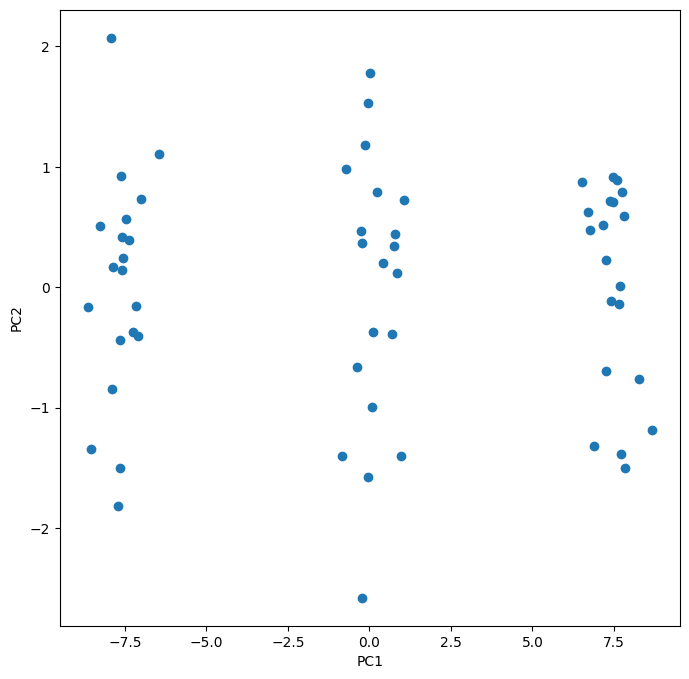

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_std=True,with_mean=True)
df_scaled=scaler.fit_transform(df)
pca_df=PCA()
pca_df.fit(df_scaled)
scores=pca_df.transform(df_scaled)



i, j =0,1 
fig, ax = plt.subplots(1,1, figsize=(8,8)) 
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel(f"PC{i+1}") 
ax.set_ylabel(f"PC{j+1}") 
#for k in range(pcagen.components_.shape[1]): 
# #ax.arrow(0,0, pcagen.components_[i,k], pcagen.components_[j,k]) 
# #ax.text(pcagen.components_[i,k]*1.15, 
# #pcagen.components_[j,k]*1.15, #df.columns[k])

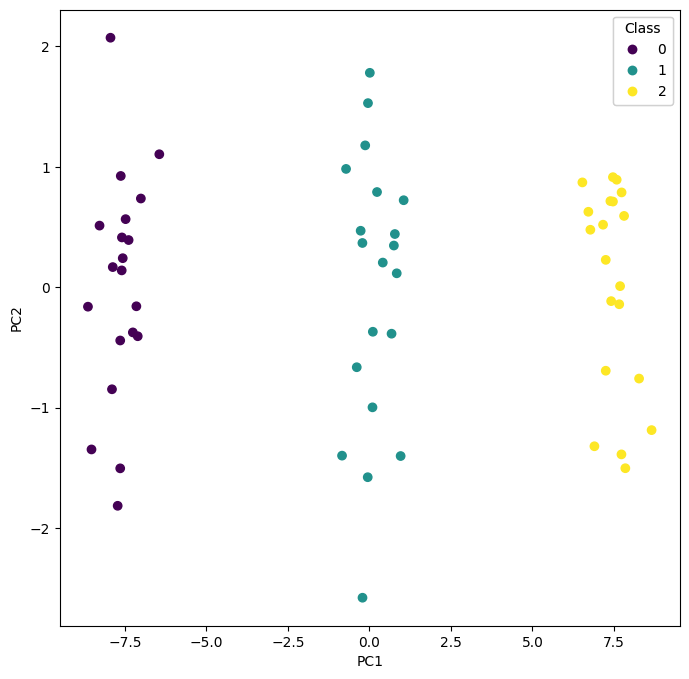

In [8]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 加上顏色參數 c=df["Class"]
scatter = ax.scatter(scores[:, 0], scores[:, 1], c=df["Class"], cmap='viridis')

ax.set_xlabel(f"PC{i+1}")
ax.set_ylabel(f"PC{j+1}")

# 加上圖例（可選）
legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)


### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

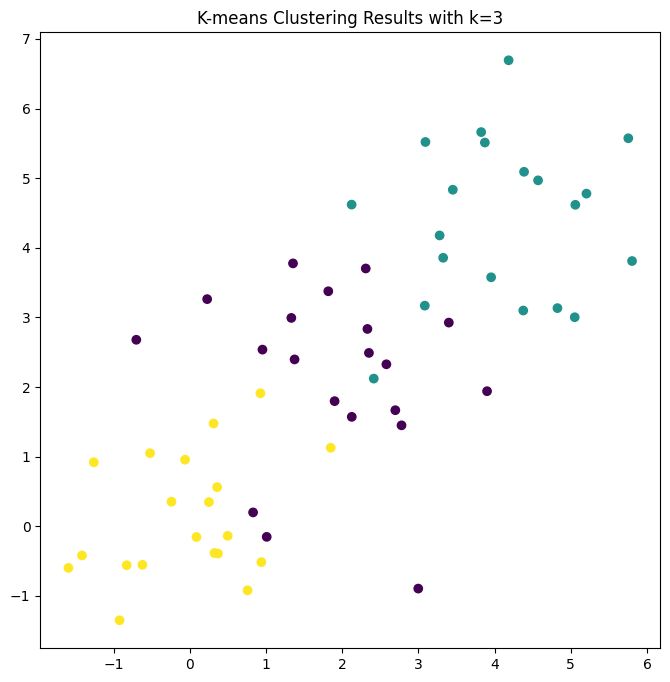

In [20]:
from sklearn.cluster import KMeans  

#kmeans = KMeans(n_clusters=3, random_state=2, n_init=20).fit(df)
#kmeans.labels_
#fig, ax=plt.subplots(1,1,figsize=(8,8))
#ax.scatter(df[:,0:49],df[:,50],c=kmeans.labels_)
#ax.set_title("K-means Clustering Results with k=3")



# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=2, n_init=20).fit(df.iloc[:, 0:50])
# --- Plot ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
ax.set_title("K-means Clustering Results with k=3")
plt.show()

In [21]:
pd.crosstab(df["Class"], kmeans.labels_, rownames=["True"], colnames=["Cluster"])

Cluster,0,1,2
True,,,
0,0,0,20
1,20,0,0
2,0,20,0


### (d) Perform K-means clustering with K = 2. Describe your results.

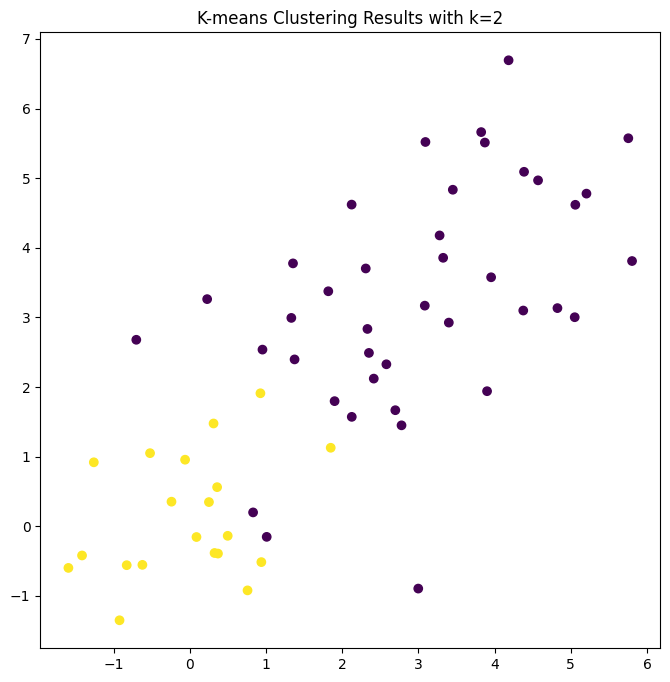

In [24]:
# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(df.iloc[:, 0:50])
# --- Plot ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
ax.set_title("K-means Clustering Results with k=2")
plt.show()

### (e)Now perform K-means clustering with K = 4, and describe your results.

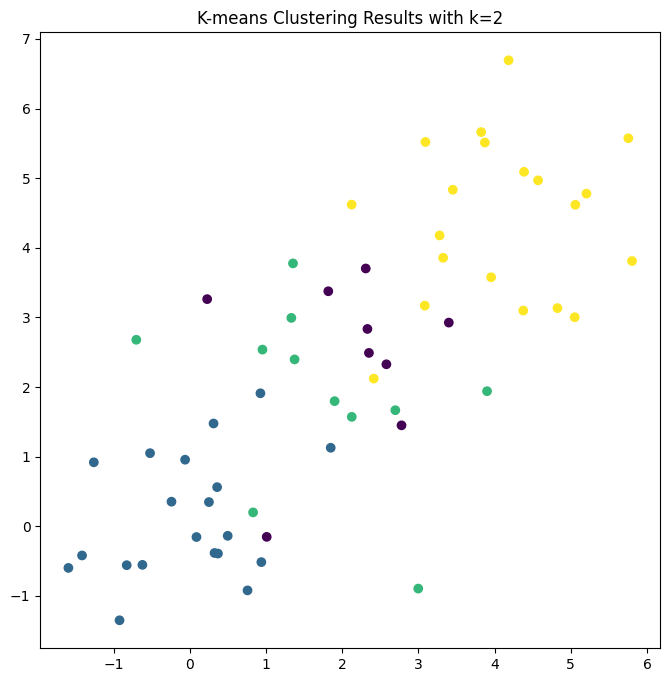

In [25]:
# --- KMeans ---
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20).fit(df.iloc[:, 0:50])
# --- Plot ---
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
ax.set_title("K-means Clustering Results with k=2")
plt.show()